## Extracting the dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajnikantroy","key":"f94a6c34e124c473ba329b714bf26d29"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 65% 34.0M/52.6M [00:00<00:00, 110MB/s]
100% 52.6M/52.6M [00:00<00:00, 127MB/s]


In [ ]:
!unzip /content/jigsaw-toxic-comment-classification-challenge.zip

Archive:  /content/jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [ ]:
!unzip /content/sample_submission.csv.zip
!unzip /content/test.csv.zip
!unzip /content/test_labels.csv.zip
!unzip /content/train.csv.zip

Archive:  /content/sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/test_labels.csv.zip
  inflating: test_labels.csv         
Archive:  /content/train.csv.zip
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
train = pd.read_csv("train.csv")
test  = pd.read_csv("test.csv")
sub   = pd.read_csv("sample_submission.csv")

print(f"Train Data Dimensions are {train.shape}")
print(f"Test Data Dimensions are {test.shape}")
print(f"Sample Submission Dimensions are {sub.shape}")


Train Data Dimensions are (159571, 8)
Test Data Dimensions are (153164, 2)
Sample Submission Dimensions are (153164, 7)


In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# EDA

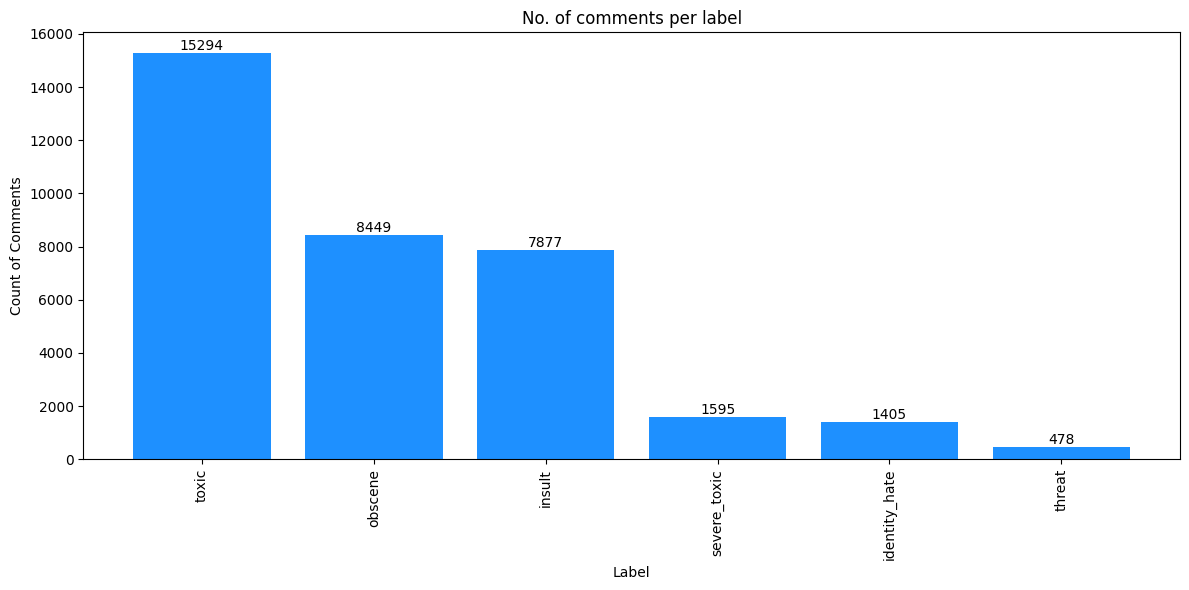

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1=pd.DataFrame(train[train.columns[2:]].sum(axis=0)).reset_index()
df1["Label"]=df1["index"]
df1["Count of Comments"]=df1[0]

df1=df1.sort_values(0, ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df1["index"], df1["Count of Comments"], color='dodgerblue')
plt.xlabel('Label')
plt.ylabel('Count of Comments')
plt.title('No. of comments per label')
plt.xticks(rotation=90)
plt.tight_layout()

for i, v in enumerate(df1["Count of Comments"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

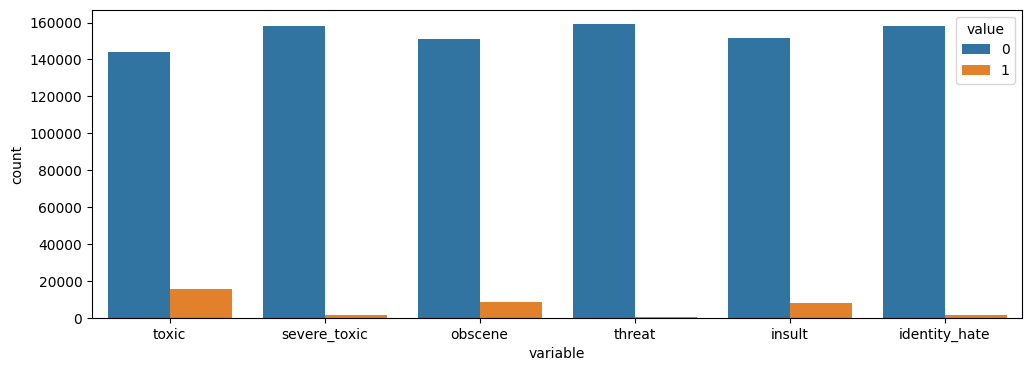

In [ ]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plt.figure(figsize=(12,4))
sns.countplot(x="variable", hue="value", data=pd.melt(train[class_names]))

plt.show()

In [ ]:
counts = []
categories = list(train.columns.values)
categories = categories[2:]
for category in categories:
    counts.append((category, train[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


In [ ]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


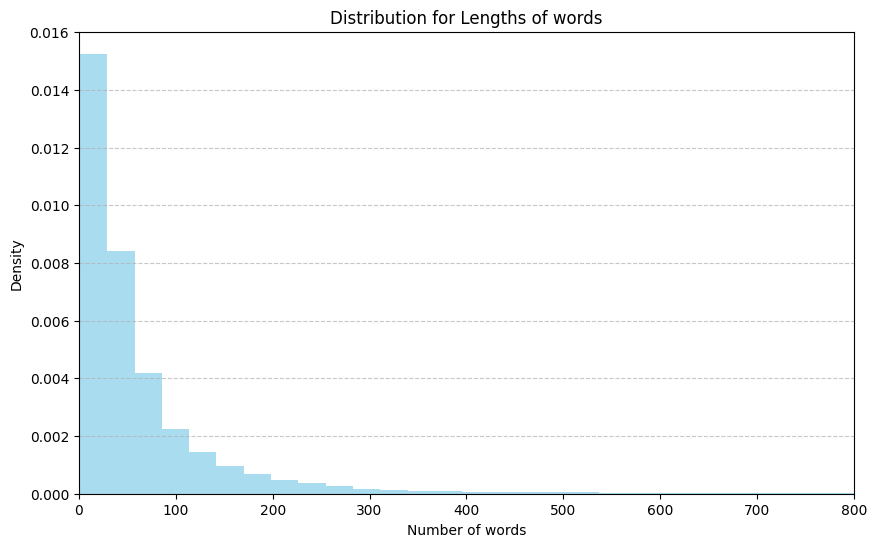

In [ ]:
comment_length = train['comment_text'].str.split().apply(len)

plt.figure(figsize=(10, 6))
plt.hist(comment_length, bins=50, density=True, color='skyblue', alpha=0.7)
plt.title("Distribution for Lengths of words")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.xlim(0, 800)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
rowSums = train.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(train))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(train)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [ ]:
# train['hate_speech'] = (train.iloc[:, 2:].sum(axis=1) > 0).astype(int)

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# num_hate_speech_rows = (train['hate_speech'] == 1).sum()
# print("Number of hate speech entries = ", num_hate_speech_rows)
# print("Total number of entries = ",train.shape[0])
# print("Total number of clean comments = ", (train.shape[0]-num_hate_speech_rows))

Number of hate speech entries =  16225
Total number of entries =  159571
Total number of clean comments =  143346


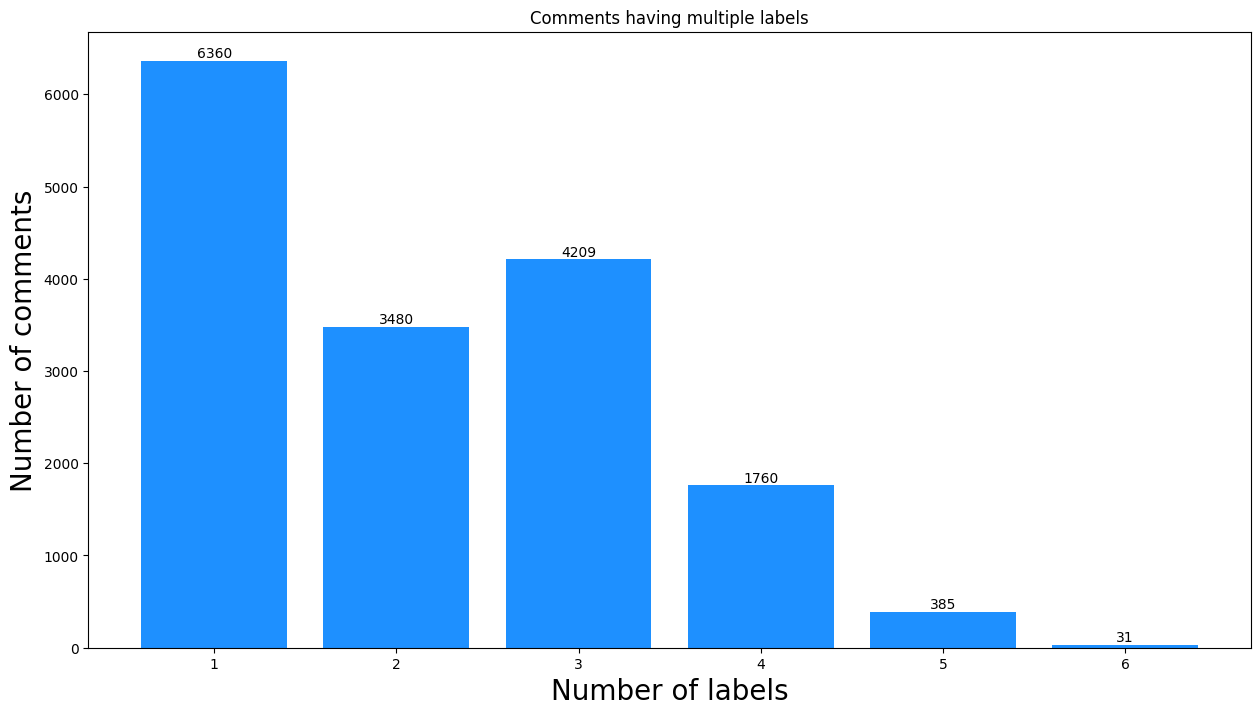

In [ ]:
rowSums = train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(15, 8))
ax = plt.bar(multiLabel_counts.index, multiLabel_counts.values, color='dodgerblue')

plt.title("Comments having multiple labels")
plt.ylabel('Number of comments', fontsize=20)
plt.xlabel('Number of labels', fontsize=20)

labels = multiLabel_counts.values
for rect, label in zip(ax, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


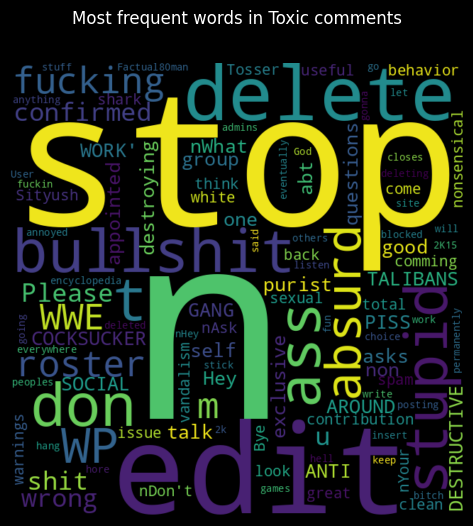

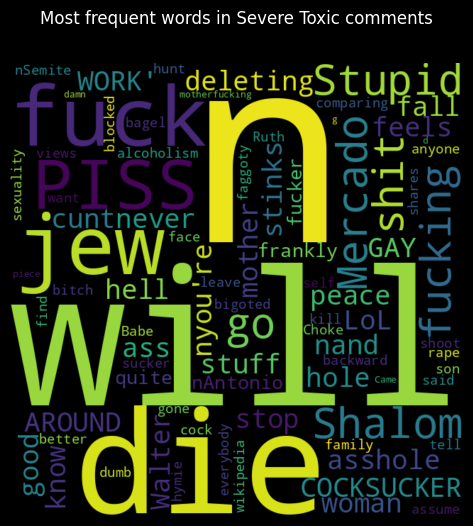

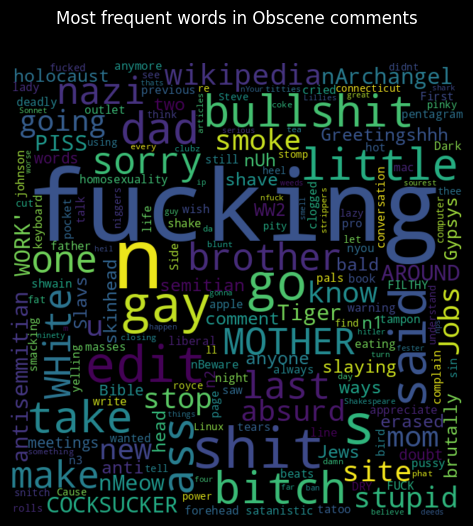

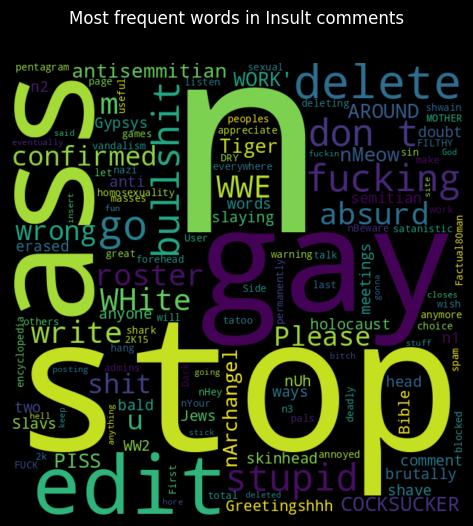

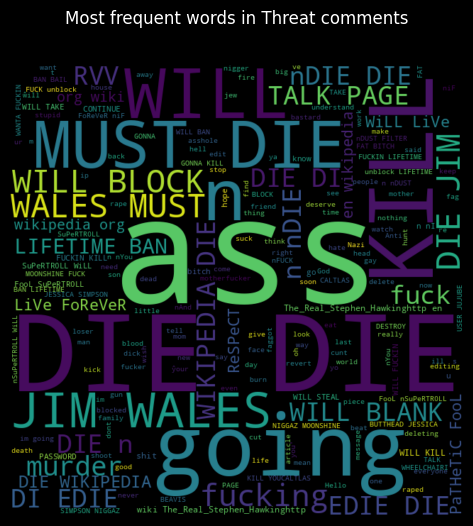

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def word_plot(column, text):
    comments = train['comment_text'].loc[column == 1].values

    word_cloud = WordCloud( width = 640, height = 640, background_color = 'black',stopwords = STOPWORDS).generate(str(comments))

    fig = plt.figure(figsize=(8, 5), facecolor='k', edgecolor='k')
    plt.subplot()
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.suptitle("Most frequent words in " + text, y=1.06, color="white")
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()

# Example usages:
word_plot(train['toxic'], "Toxic comments")
word_plot(train['severe_toxic'], "Severe Toxic comments")
word_plot(train['obscene'], "Obscene comments")
word_plot(train['insult'], "Insult comments")
word_plot(train['threat'], "Threat comments")


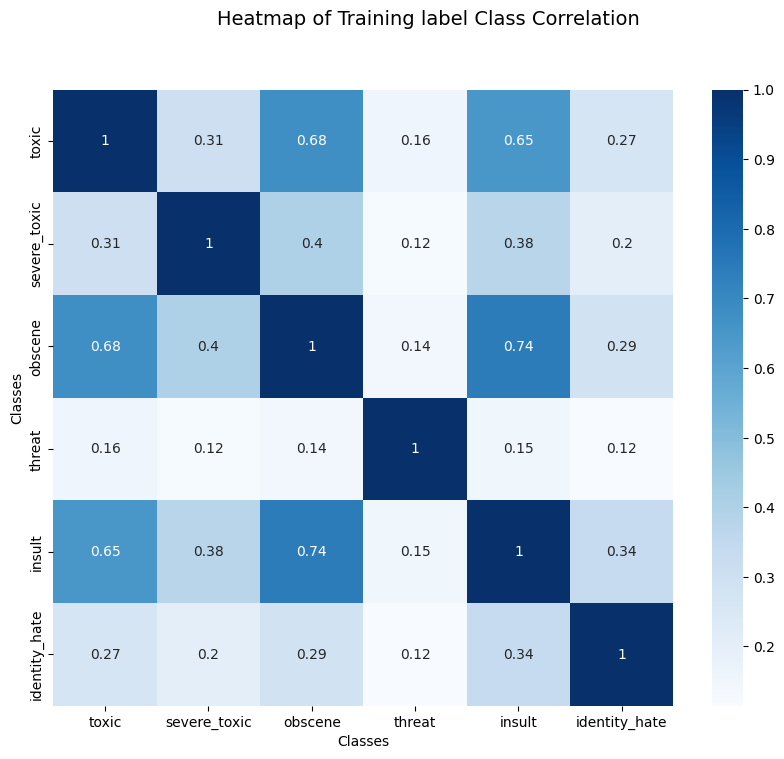

In [ ]:
fig = plt.figure(figsize = (10,8))
sns.heatmap(train.corr(), annot=True,cmap="Blues")
plt.suptitle('Heatmap of Training label Class Correlation',size = 14)
plt.xlabel("Classes")
plt.ylabel("Classes")
plt.show()

In [ ]:
correlation_val =  train.corr()
correlation_val

,toxic,severe_toxic,obscene,threat,insult,identity_hate,hate_speech
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144
hate_speech,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000
